# Assignment 4: Churn analysis on Reddit
### Mariam Adeyemo, Mia Song, Nida Ulhaq Fitriyah, Rolamjaya Hotmartua

You are limited to using the libraries which are included in core Python and Pandas/Numpy.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

The file: `RC_2012_year_cohort.feather` contains data from January 2012 to November 2012. 
1) `author` which contains the user name of the person writing the comment
2) `created_utc` the timestamp of the comment. This field contains the number of seconds since "epoch," Jan 1, 1970. This is an arbitrary date chosen to represent the "beginning of time" in computer systems (originally in the Unix operating system). Most date libraries know how to convert this time to human understandable time.
3) `subreddit` which contains the name of the subreddit where the author posted a comment.

In [3]:
pip install pyarrow

  Using cached pyarrow-11.0.0-cp39-cp39-macosx_10_14_x86_64.whl (24.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
df_raw = pd.read_feather('RC_2012_year_cohort.feather')

In [5]:
df = df_raw.copy()

In [6]:
df.shape

(234225454, 3)

In [7]:
df.isnull().sum()

created_utc    0
author         0
subreddit      0
dtype: int64

In [8]:
df.columns

Index(['created_utc', 'author', 'subreddit'], dtype='object')

In [9]:
df.head()

,created_utc,author,subreddit
0,1325376000,irwinator,AskReddit
1,1325376000,reed311,politics
2,1325376000,sagapo3851,gaming
3,1325376000,filthgrinder,politics
4,1325376001,BitterDivorcedDad,WTF


In [10]:
df['subreddit'].value_counts(ascending = False)

AskReddit              32023468
funny                  11909021
pics                    8973606
gaming                  6966306
WTF                     6377885
                         ...   
gentlemenwithboners           1
nooklend                      1
spamstoppers                  1
explainedbygif                1
trainerroad                   1
Name: subreddit, Length: 54513, dtype: int64

In [11]:
df['author'].value_counts(ascending = False)

[deleted]           41052271
qkme_transcriber      201767
ModerationLog         101516
AutoModerator          70520
AlyoshaVasilieva       42433
                      ...   
cranberryhills             1
crowb4r                    1
crumble_train              1
csblanton                  1
zolltanzed                 1
Name: author, Length: 2920934, dtype: int64

# 1. Find the top 30 subreddits
- Count the number of comments in each subreddit, sort that list and pick the top 30.
- While you are writing this code, it may be easier just to pick any three smaller sub-reddits. With smaller amount of data, you will be able to develop your code faster. Once you are sure the code works, switch to the top 30 sub-reddits.
- The remaining steps will be done per-subreddit. You can write the following logic in a function and call that function for each sub-reddit you are analyzing.

In [12]:
# We wii remove when an author is not identifiable 
df = df[df['author'] != '[deleted]']

In [13]:
top30_subreddits = df['subreddit'].value_counts(ascending = False).head(30)
top30_subreddits

AskReddit              25842429
funny                   9760035
pics                    7361727
gaming                  5857771
WTF                     5228718
politics                4402819
atheism                 4101406
leagueoflegends         3539247
IAmA                    3159398
trees                   3150949
videos                  2914460
AdviceAnimals           2897671
todayilearned           2316051
fffffffuuuuuuuuuuuu     2304228
worldnews               1770750
nfl                     1722620
movies                  1458599
starcraft               1436597
aww                     1385738
gonewild                1321255
Minecraft               1283522
technology              1193174
soccer                  1117172
Diablo                   962937
Guildwars2               955898
Music                    945311
nba                      936146
mylittlepony             935451
Games                    891084
guns                     868893
Name: subreddit, dtype: int64

In [14]:
# We will save the 30 commented subreddits
topics = top30_subreddits.index.tolist()

# 2. Filter the dataframe so you are only looking at data form a single sub-reddit.
- After this step, you should have a dataframe which only contains `author` and `created_utc` (you don't need the sub-reddit, because you are only working with a single sub-reddit at a time).

In [15]:
def single_subreddit(name):
    single_subreddit = df[df['subreddit'] == name].loc[:, ['author', 'created_utc']]
    return  single_subreddit

In [16]:
single_subreddit('vancouver')

,author,created_utc
638,otayyo,1325376106
914,FrEaK40,1325376155
1279,harrywhite1,1325376215
3043,iLoveIceCreamToo,1325376504
4611,atm_snowball,1325376769
...,...,...
234216200,Creepybusguy,1354319163
234219629,sweetsmellingtoilets,1354319472
234221961,JKilla77,1354319688
234222283,JKilla77,1354319720


In [17]:
# Pseudocode with toy sample vancover
vc = single_subreddit('vancouver')
len(vc['author'].unique())

6634

In [18]:
vc['created_utc'] = pd.to_datetime(vc['created_utc'], unit='s').dt.date
vc

,author,created_utc
638,otayyo,2012-01-01
914,FrEaK40,2012-01-01
1279,harrywhite1,2012-01-01
3043,iLoveIceCreamToo,2012-01-01
4611,atm_snowball,2012-01-01
...,...,...
234216200,Creepybusguy,2012-11-30
234219629,sweetsmellingtoilets,2012-11-30
234221961,JKilla77,2012-11-30
234222283,JKilla77,2012-11-30


In [19]:
# Passing 'author' to groupby will recall all the 'author' in the data frame 
# vc.groupby('author')['created_utc'].min()

In [20]:
# https://stackoverflow.com/questions/71550408/pandas-group-by-on-a-subset-returns-wrong-number-of-rows
# the observed=True parameter indicates that Pandas should use the actual values in the data to determine the categories for grouping, rather than inferring the categories from the data.
vc_day0 = vc.groupby('author', observed=True)['created_utc'].min() 
vc_day0

author
otayyo              2012-01-01
FrEaK40             2012-01-01
harrywhite1         2012-01-01
iLoveIceCreamToo    2012-01-01
atm_snowball        2012-01-01
                       ...    
skotgun             2012-11-30
livecables          2012-11-30
Sonofadyke          2012-11-30
karshek             2012-11-30
Super_Awesome       2012-11-30
Name: created_utc, Length: 6634, dtype: object

In [21]:
vc_day0 = vc_day0.to_frame()
vc_day0 = vc_day0.rename(columns = {'created_utc':'day0'})
vc_day0

,day0
author,
otayyo,2012-01-01
FrEaK40,2012-01-01
harrywhite1,2012-01-01
iLoveIceCreamToo,2012-01-01
atm_snowball,2012-01-01
...,...
skotgun,2012-11-30
livecables,2012-11-30
Sonofadyke,2012-11-30


In [22]:
vc_clean = pd.merge(vc, vc_day0, on = 'author')
vc_clean

,author,created_utc,day0
0,otayyo,2012-01-01,2012-01-01
1,otayyo,2012-01-04,2012-01-01
2,otayyo,2012-01-04,2012-01-01
3,otayyo,2012-01-06,2012-01-01
4,otayyo,2012-01-06,2012-01-01
...,...,...,...
86387,Sonofadyke,2012-11-30,2012-11-30
86388,Sonofadyke,2012-11-30,2012-11-30
86389,karshek,2012-11-30,2012-11-30
86390,karshek,2012-11-30,2012-11-30


In [23]:
vc_retain = vc_clean.copy()
vc_retain['day_passed'] = (vc_clean['created_utc'] - vc_clean['day0']).dt.days
vc_retain.drop_duplicates(subset=['author', 'day_passed'], inplace=True)
vc_retain = vc_retain.drop(['created_utc', 'day0'], axis = 1)
vc_retain

,author,day_passed
0,otayyo,0
1,otayyo,3
3,otayyo,5
5,otayyo,6
6,otayyo,23
...,...,...
86381,skotgun,0
86383,livecables,0
86384,Sonofadyke,0
86389,karshek,0


In [24]:
# Create pivot table
# In the code you provided, fill_value=0 is used to specify that if there are any missing values in the pivot table, they should be filled with the value 0. This means that if there are any combinations of author and day_passed that have no corresponding observations in vc_retain, the resulting pivot table will have a value of 0 for that combination.
vc_pivot = vc_retain.pivot_table(index='author', columns='day_passed', aggfunc=len, fill_value=0)
vc_pivot

day_passed,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,332,333,334
author,,,,,,,,,,,,,,,,,,,,,
0v329000,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150c_vapour,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1third,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
800EXPRESS,1,0,0,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
83kk4h,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hiiamkat,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
millefeuilles,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
skotgun,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Add column sums to pivot table
vc_sums = vc_pivot.sum(axis=0)

In [26]:
day0 = vc_sums[0]
vc_retention = vc_sums.div(day0)
vc_retention 

day_passed
0      1.000000
1      0.113205
2      0.058637
3      0.049292
4      0.043111
         ...   
330    0.003316
331    0.003316
332    0.002261
333    0.001658
334    0.001507
Length: 335, dtype: float64

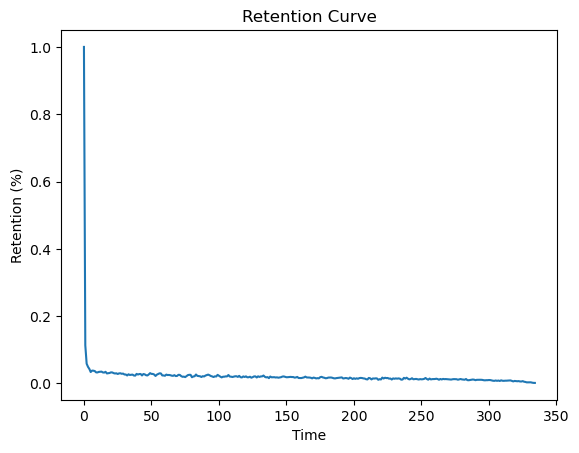

In [27]:
# Create line plot using sns.lineplot
sns.lineplot(x=vc_pivot.columns, y=vc_retention)

# Add axis labels and title
plt.xlabel('Time')
plt.ylabel('Retention (%)')
plt.title('Retention Curve')

# Show plot
plt.show()

# 3. Find the date of first interaction (for that sub-reddit)
- Since we are looking to calculate metrics per sub-reddit, if `user123` posts a comment on 'gaming' and 'politics', we will consider them to be different authors.
- Since our analysis will be done on a relative time basis (day 0 and day 1 will be different for different users), calculate the date on which an author posted their first comment to that sub-reddit. This will serve as our "day zero." You should end up with a dataframe containing the author and the date of the first comment.

In [28]:
# For now, we only use two topics for the convenience, but we should remove this for the final reseult
# topics = ['Michigan', 'vancouver']

In [29]:
# We will create a data frame for a single subreddit and change the time frame
top30 = {}
for topic in topics:
    top30[topic] = single_subreddit(topic)
    top30[topic]['created_utc'] = pd.to_datetime(top30[topic]['created_utc'], unit='s').dt.date

In [30]:
# top30['vancouver']

In [31]:
# We will create a series to find the first date of comment for each user
day0 = {}
for topic in topics:
    day0[topic] = top30[topic].groupby('author', observed=True)['created_utc'].min() 
    day0[topic] = day0[topic].reset_index()  # convert series to dataframe

In [32]:
# day0['vancouver']

# 4. Combine the initial dataframe with the dataframe containing comment timestamps
- After the second step, you had a dataframe containing the name of the author who commented and the time in which they commented. Combine this with the dataframe from step 2, where you created a dataframe which contains the name of the author who commented and the time when they _first__ commented (in that sub-reddit).
- You can combine these two dataframes using the `merge` function (among other methods). At a high level, you are able to combine the two dataframes because they both contain the `author` column.
- Note that we don't need hour/minute/second information. We are only concerned about their daily activity. You are welcome to use the created_utc field, as it exists, but this assignment will likely be easier if you use `pd.to_datetime` to convert to an actual `datetime` type.
- You should now have a dataframe which contains the author's name, the date of their first comment and the date of their current comment.
- Use the two dates in  your new dataframe to calculate the number of days since the first comment. 
- You no longer need the original dates. You can do the rest of your analysis just with the author name and the column containing the days (since day zero) on which the author made a comment.
- Note that many authors will comment in a subreddit multiple times in a day. We don't care about multiple comments. We are only care if they commented in a sub-reddit _at least_ once on that day.

In [33]:
# We will merge the day 0 infomration with the original data
merged = {}
for topic in topics:
    merged[topic] = pd.merge(top30[topic], day0[topic], on='author', how='left')
    merged[topic].rename(columns={'created_utc_x': 'created_utc', 'created_utc_y': 'day0'}, inplace=True)

In [34]:
# merged['vancouver']

In [35]:
# We calulate the time interval between the date of comment and day0
# We will drop all the unnecessary columns from this point

cleaned = {}
for topic in topics:
    cleaned[topic] = merged[topic].copy()  # create a copy of the merged dataframe
    cleaned[topic]['day_passed'] = (merged[topic]['created_utc'] - merged[topic]['day0']).astype('timedelta64[D]')
    cleaned[topic].drop_duplicates(subset=['author', 'day_passed'], inplace=True)
    cleaned[topic].drop(['created_utc', 'day0'], axis=1, inplace=True)

In [36]:
# cleaned['vancouver']

# 5. Pivot the dataframe so the names of authors are on one axis and the days on which they commented are on the second axis
- This should be a pretty sparse matrix. Most authors will not comment on most days. Therefore, entries in those cells will be 0. The remaining cells will contain 1, 

In [37]:
# We will create pivot tables for the top30 topics
pivot = {}

for topic in topics:
    pivot[topic] = cleaned[topic].pivot_table(index='author', columns='day_passed', aggfunc=len, fill_value=0)

In [38]:
# pivot['vancouver']

# 6. Sum the number of commenters for each day
- On day 0, you should have the highest number of authors who commented. On day 1, this number should drop pretty significantly. On day 2, this number should drop further, and so on.

In [39]:
# We will sum the each column 
total = {}

for topic in topics:
    total[topic] = pivot[topic].sum(axis=0) 

In [40]:
# total['vancouver'].iloc[0]

# 7. Calculate the % of authors who returned after their first comment
- Using day 0 as the baseline, calculate the percentage of authors who made comments in subsequent days. Say, for day 45, if 23 authors commented, but on day 0 100 had commented, then 23% of authors were _retained_ on day 24. Naturally, actual number of authors will be far larger and the percentage of authors retained will be much smaller.

In [41]:
# We will divide the sum of each column with the sum of day0
retention = {}

for topic in topics:
    retention[topic] = total[topic] / total[topic].iloc[0]

In [42]:
# retention['vancouver']

In [44]:
retention

{'AskReddit': day_passed
 0.0      1.000000
 1.0      0.105089
 2.0      0.070845
 3.0      0.061063
 4.0      0.056756
            ...   
 330.0    0.005233
 331.0    0.004534
 332.0    0.003671
 333.0    0.002545
 334.0    0.001458
 Length: 335, dtype: float64,
 'funny': day_passed
 0.0      1.000000
 1.0      0.077328
 2.0      0.051147
 3.0      0.045119
 4.0      0.041871
            ...   
 330.0    0.002944
 331.0    0.002519
 332.0    0.001979
 333.0    0.001378
 334.0    0.000717
 Length: 335, dtype: float64,
 'pics': day_passed
 0.0      1.000000
 1.0      0.070098
 2.0      0.043393
 3.0      0.037795
 4.0      0.035505
            ...   
 330.0    0.002046
 331.0    0.001793
 332.0    0.001509
 333.0    0.001035
 334.0    0.000551
 Length: 335, dtype: float64,
 'gaming': day_passed
 0.0      1.000000
 1.0      0.071444
 2.0      0.041792
 3.0      0.036108
 4.0      0.032800
            ...   
 330.0    0.002400
 331.0    0.002000
 332.0    0.001623
 333.0    0.001461
 334.

# 8. Display this series on a chart
- You have created a 'retention curve'. Your chart should look similar to the charts in the linked blog post above. You can also do a google image search for "retention curve" to see how clients from almost every industry behave similarly.
- Repeat this for the remaining 30 top sub-reddits. Please don't cut and paste this code 30 times. There are better ways, such as using functions to encapsulate this logic.
- The final result should be a single chart, displaying all 30 retention curves.

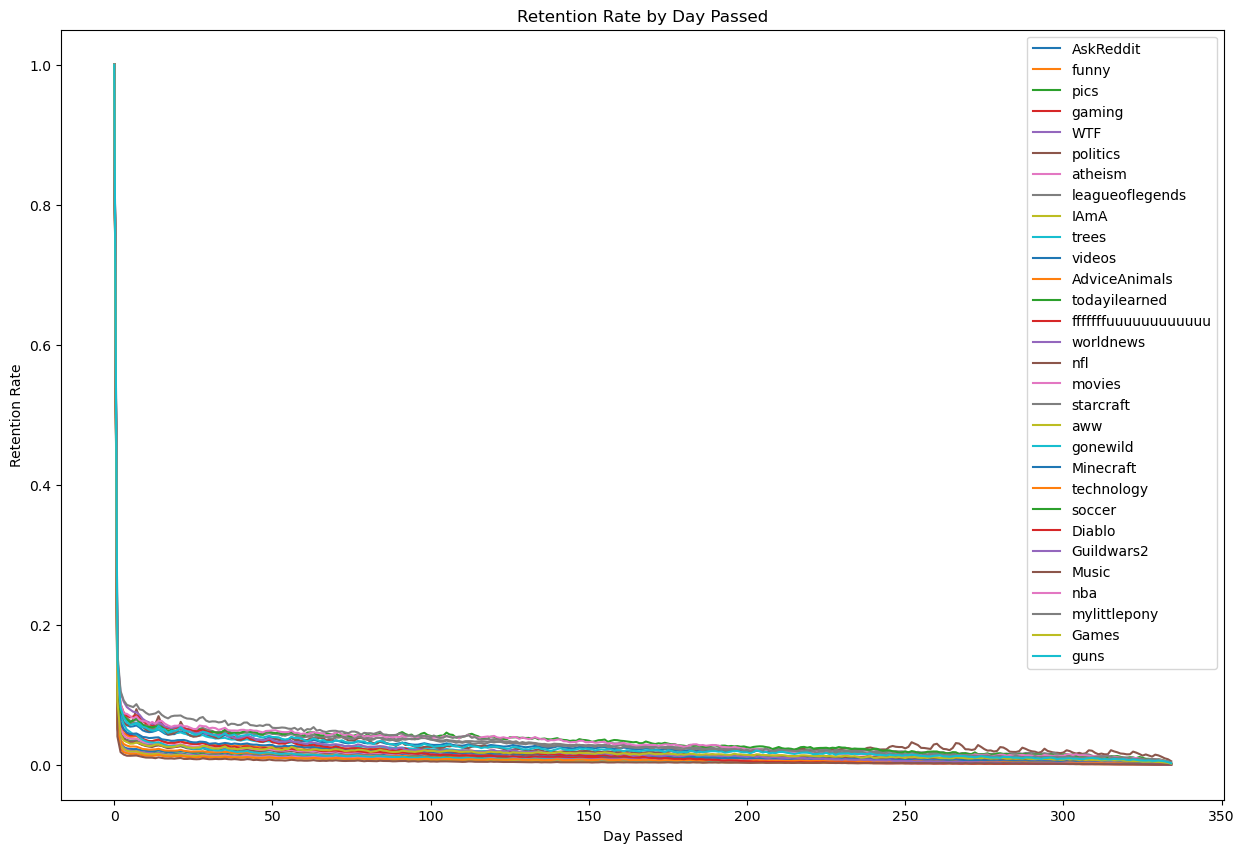

In [43]:
import matplotlib.pyplot as plt

# create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 10))

# iterate over topics and plot each line
for topic in topics:
    x = retention[topic].index
    y = retention[topic].values
    ax.plot(x, y, label=topic)

# set the title and labels for the plot
ax.set_title('Retention Rate by Day Passed')
ax.set_xlabel('Day Passed')
ax.set_ylabel('Retention Rate')

# add a legend to the plot
ax.legend()

# show the plot
plt.show()